# SymPy i LinAlys

__Foreslået ændringer:__ 
I denne her Notebook er der ikke brug for de store ændringer til struktur. 

Når jeg har talt med de andre kurser, er vi dog blevet enige om, at man skal have en forståelse af pakkerne, og vi skal derfor måske bevæge os væk fra en "anbefalet" blok af tekst, men i stedet bare hente tingene ind, når vi skal bruge dem. 

Med denne nye struktur, burde vi også overveje om grænser skal rykkes til en anden notebook, så vi i stedet blot har overskrifter og ikke nødvendigvis har det på ugentlig basis.

Desuden bør vi nok gennemgå, hvad der er syntaks, og hvad der er kaldesekvens. Dette gør jeg, når jeg retter dem til. 

# Hvad er SymPy?

I denne notebook vil vi kigge på, hvordan vi benytter SymPy. Selve SymPy er et bibliotek i Python, der lader os arbejde med symbolske udtryk. Vi starter med at importere SymPy på samme måde, som vi importerede  biblioteker i den sidste notebook. Derfor vil vi starte alle notebooks med at importere SymPy og benytte forkortelsen "sp" for biblioteket: <code>import sympy as sp</code>.  
SymPy har flere indbyggeret printe-værktøjer. Vi bruger funktionen <code>sp.init_printing()</code>, som gør det muligt at få udtryk vist i LaTeX-format (LaTeX er det førende system til at skrive matematiske tekster).
Den normale <code>print()</code> i Python printer output i "string"-format, mens funktionen <code>display()</code> fra <code>IPython.display</code> vil være vores foretrukne valg til at vise SymPy-udtryk som LaTeX.  

In [71]:
import sympy as sp                    # Importer SymPy
from IPython.display import display   # Importer display-funktionen 
sp.init_printing()                    # Aktiver pretty-printing

## Symboler og tal

På samme måde som vi kan have variable i Python som _strings_, logiske booleans eller talværdier, så tilføjer SymPy muligheden for symbolske variable, f.eks. svarende til hvad vi normalt kalder en ubekendt i ligningsløsning eller den (uafhængige) variabel i en funktion. Vi ønsker således at have muligheden for angive en variabel som $x$ i $f(x) = x^2+3x-2$ og opfatte den som et abstrakt objekt i modsætning til at tildele $x$ en værdi. Den nemmeste måde at definere symboler på er at importere dem fra underbiblioteket <code>sympy.abc</code>, som indeholder de fleste symboler, som vi til dagligt bruger. Vi kan altså definere f.eks. $x, a, b$ og $\phi$ som symboler ved at skrive:

In [72]:
from sympy.abc import x, a, b, phi

Nu kan vi benytte disse variable i beregninger:

In [73]:
a + b + phi # Vi kan lægge dem sammen

Vi kan også danne nye udtryk med symbolske værdier. Udtrykkene kan sættes sammen ved at benytte normale Python-operationer såsom: <code>+</code>, <code>-</code>, <code>*</code>,<code>/</code> eller <code>**</code>. Derudover kan vi benytte en del andre regneoperationer ved at skrive <code>sp.</code> foran operationen. 
Her er samlet de typiske regneoperationer, som man kan finde i SymPy
- Kvadratrødder: <code>sp.sqrt(x)</code> (benyt sp.root(x, n) til at tage n'te rod af x)
- Trigonometriske funktioner: <code>sp.cos(x), sp.sin(x), sp.tan(x)</code>. (de inverse findes ved eksempelvis <code>acos(x)</code>)
- Exponentialfunktion <code>sp.exp(x)</code>
- Logaritmer: <code>sp.log(x)</code>. For at få 10-talslogaritmefunktionen skrives <code>log(x, 10)</code>

En mere omfattende [liste over regneoperationer kan findes her.](https://docs.sympy.org/latest/modules/functions/elementary.html)

Så eksempelvis, kan vi sammensætte et udtryk ved at benytte exponentialfunktionen <code>sp.exp</code> sammen med vores symboler:  

In [74]:
a * sp.exp(2*x + phi)

Vi kan også danne nye symbolske variable ud fra eksisterende variable. Vi kan f.eks. definere en funktion $f$ baseret på tal og eksisterende symbolske variable:

In [75]:
f = a * sp.exp(2*x + phi)

Bemærk at vi ikke behøver at definere $f$ som symbolsk variabel. Python/SymPy kan godt regne ud at f bliver en symbolsk variabel idet den er opbygget af andre symbolske variable. Resultatet kan vises med <code>display()</code>-funktionen:

In [76]:
display(f)

### Eksakt repræsentation af tal

Python opfatter <code>/</code> som en numerisk operation, og nå vi vil have eksakte tal-brøker, må vi eksplicit bede SymPy om at opfatte dem som sådan ved hjælp af <code>Rational(a, b)</code>

In [77]:
brøk = sp.Rational(1, 3)
display(brøk)

En brøk bestående bestående af symboler lider ikke under samme problem, så der kan vi bare bruge almindelig division. 

In [78]:
c = a/b
display(c)

Vi kan regne med brøkerne ved hjælp af de almindelige regnearter:

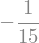

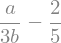

In [79]:
p = sp.Rational(1, 3)
q = sp.Rational(2, 5)
display(p - q)

p = sp.Rational(1, 3)
q = sp.Rational(2, 5)
display(p*a/b - q)

Vi får ofte brug for eksakte værdier af $\pi$ og evt. andre særlige tal. En eksakt værdi af $\pi$ får vi ved at skrive <code>from sympy import pi</code>. Når vi sammensætter symbolske variable og $\pi$ med tal i brøker, kan vi som nævnt ovenfor godt bruge almindelige division istedet for <code>sp.Rational(tæller, nævner)</code>, da Python på grund af symbolerne ikke kan behandle udtrykkene som numerisk repræsenterede tal (_floats_):

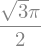

In [80]:
from sympy import pi
value = sp.sqrt(3) * pi / 2
display(value)

Desuden kan vi hente nogle andre brugbare symboler fra SymPy, som eksempelvis uendelig, <code>oo</code> (der skrives som to små o'er og ligner et uendelighedstegn hvis man har lidt fantasi).

In [81]:
from sympy import oo # Importer værdien uendelig
1 / oo               # 1 divideret med uendelig giver 0, i hvert tilfælde for fysikere :o)

På samme måde kan vi også importere den imaginære enhed $i = \sqrt{-1}$, som i SymPy er angivet ved et stort <code>I</code>. Hvis man hellere vil lave numeriske beregninger med komplekse tal, benytter man i stedet <code>j</code> og kan f.eks. skrive <code>2 + 3j</code>. _Hvis du ikke kender til de komplekse talk, så gå ikke i panik. De bliver introduceret i slutningen af blok 1_

In [82]:
from sympy import I # Importer I
z = 3 + 3 * I       # definer to tal
q = 1 - 2 * I
display(z, q)       # Vi viser dem med display()

Vi vil vende tilbage til imaginære tal i SymPy i en senere notebook.

## Evaluer udtryk

Forestil dig at vi har et symbolsk udtryk, der indeholder den variable $a$, og vi ønsker at indsætte værdien $a = 2$. Til dette vil vi nu indføre de to metoder <code>.subs()</code> og <code>.evalf()</code>. For et udtryk $f$, som eksempelvis kunne være <code>f = a ** 2 + b</code>, kan vi indsætte $a = 2$ ved at skrive <code>f.subs(a, 2)</code>.

### Symbolsk substituering
Vi kunne for eksempel for et udtryk $cos(x \cdot \pi / 4)$ ønske at finde værdien for forskellige værdier af x:

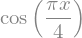

In [83]:
# Vi definerer funktionen f:
f = sp.cos(x * pi / 4)
display(f)

# Vi kan nu finde værdien, hvis x var 2 ved at skrive:
display(f.subs(x, 1))

Vi kan også indsætte et udtryk ind i et andet:

In [84]:
from sympy.abc import x, a, b, c    # Vi har allerede x, a, og b til rådighed fra ovenfor, men skal have c med.
f = a * b * x + x
display(f)

g = b ** 2 + c ** 2
display(g)

f.subs(x, g)

Her har vi altså defineret to udtryk og erstattet alle forekomster af x i det første udtryk med $g = a^2 + b^2$. Vi kunne have opået det samme (nemmere, men mindre generelt) ved at skrive:

In [85]:
g = b ** 2 + c ** 2
f = a * b * g + g

display(f)

### Numerisk evaluering

Når vi har et matematisk udtryk, er det en fordel også at kunne finde en numerisk approksimation. Til at gøre dette benytter vi metoden <code>.evalf(cifre)</code>, som giver en approksimation med det angivne antal cifre. Det simpleste eksempel er, hvis vi ønsker at finde det første 10 cifre af pi:

In [86]:
pi.evalf(10)         # evalf(10), giver os de første 10 cifre

Vi kan benytte de to metoder i kombination, hvis vi eksempelvis vil finde værdien af et udtryk og så approksimere det.

In [87]:
f = sp.exp(x / 5)
display(f)

f_3 = f.subs(x, 3) # Substituerer x med 3 og gemmer det i en variabel, der hedder f_3.
# Det er sådan vi gerne vil have svaret skrevet i pointopgaverne i LinALys: så simpelt som muligt men stadig eksakt.
display(f_3)

f_3.evalf(3) # Lad os finde værdien som decimaltal med 3 cifre.
# ... hvilket er praktisk f.eks. hvis vi skulle tegne resultatet ind i en illustration

## Grænser
En anden anvendelse af symbolske udtryk er beregning af grænseværdier. Fokus i kurset er på beregning af grænseværdier med papir og blyant, men det er godt at kunne checke sine resultater eller lave mere avancerede beregninger med SymPy. Dette gøres relativt nemt ved at benytte <code>sp.limit</code>-funktionen. Syntaksen er 
<code>sp.limit(udtryk, variabel, grænse for variabel, retning)</code>. Efterlades retningen blank, beregnes grænseværdien oppefra / fra højre, og man får _ingen advarsel_ selvom grænseværdierne fra henholdsvis højre og venstre er forskellige.

Hvis vi nu eksempelvis vil beregne $\lim_{x\to 0} e^{-x}$ skriver vi:

In [88]:
expr = sp.exp(-x)                    # Definer udtryk
display(sp.limit(expr, x, 0, '+'))   # Beregn og vis grænseværdien af udtrykket for x gående mod 0 oppefra ...
display(sp.limit(expr, x, 0, '-'))   # ... og nedenfra

hvilket ikke er den store overraskelse, eftersom $e^{-x}$ er defineret i $x=0$, er kontinuert, og $e^0=1$.

Vi kan også beregne grænseværdier for $x\to\infty$:

In [89]:
sp.limit(expr, x, oo)    # grænsen af udtrykket for x gående mod uendelig. Vi angiver ingen retning.

Vær særligt opmærksom på situationer, hvor grænseværdien kunne være forskellig oppefra og nedefra, hvilket oftest forkommer for udtryk på brøkform i det/de $x$-værdier, hvor nævneren antager værdien nul. Betragt f.eks. $\displaystyle \frac{x^{4} + x^{2} + 1}{3 x^{3} - 19 x^{2} - x}$ når $x \to 0$:

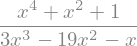

In [90]:
# Definer tæller og nævner hver for sig
poly1 = x ** 4 + x ** 2 + 1
poly2 = 3* x ** 3 - 19 * x **2  - x

# Kombiner dem til det ønskede udtryk og udskriv udtrykket til skærmen
poly_div = poly1 / poly2
display(poly_div)

# Tag grænsen af udtrykket, når x går mod 0 først oppefra / fra højre 
sp.limit(poly_div, x, 0, '+')

In [91]:
# ... og dernæst nedefra / fra venstre:
sp.limit(poly_div, x, 0, '-')

## Anbefalet import-blok

Igennem notebooken ovenfor har vi oprettet variable flere gange for at vise ret lokalt, hvad der skulle importeres for at køre en bestemt bid kode. Det er dog ikke nødvendigt at importere ting mere end en gang, så hvis man har en god idé om, hvad der skal importeres på forhånd, kan man gøre dette i starten af sin notebook. 
Herunder er der et godt forslag til, hvad man kan importere i starten af en notebook, der skal bruges til at løse opgaver i LinaLys:

In [92]:
import sympy as sp                    # Importer sympy
from sympy.abc import x               # Vi henter vores variabel. Tilføj blot alle de variable, ubekendte, parametre, konstanter osv., du har brug for
from sympy import oo, pi, I           # Vi importerer uendelig, pi og den imaginære konstant I 

sp.init_printing()                    # Aktiver pretty-printing
from IPython.display import display   # Hent vores printer til matematiske udtryk

Her er SymPy importeret som <code>sp</code>, så vi kan bruge SymPy funktioner uden at skulle skrive så meget. Derudover har vi importeret $x$, som en variabel og $\infty, \pi$ og $i$. Derudover er der blevet aktiveret printe-funktionerne i Sympy.